In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, classification_report

In [32]:
df = pd.read_csv(r'C:\Users\Hp\Downloads\Practice Data frames\database\50_startups.csv')

In [33]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


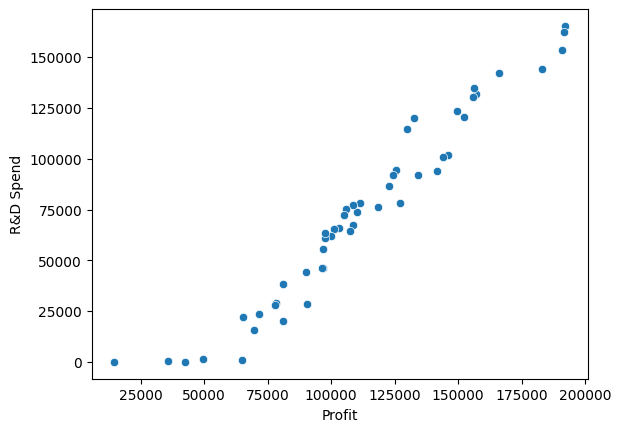

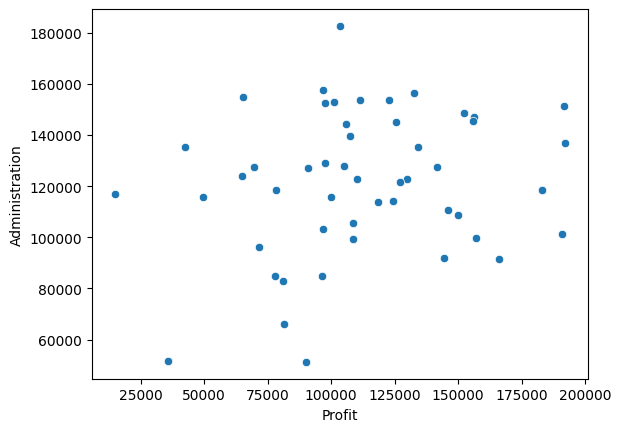

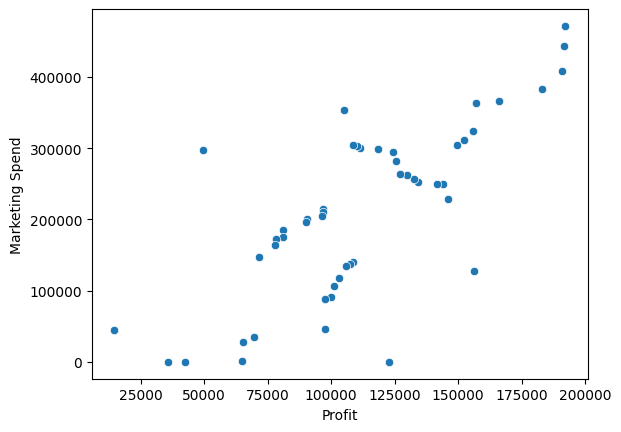

In [34]:
for i in df.columns:
    if i not in ['Profit', 'State']:
        sns.scatterplot(x = df['Profit'], y = df[f'{i}'])
        plt.show()

<Axes: xlabel='State', ylabel='count'>

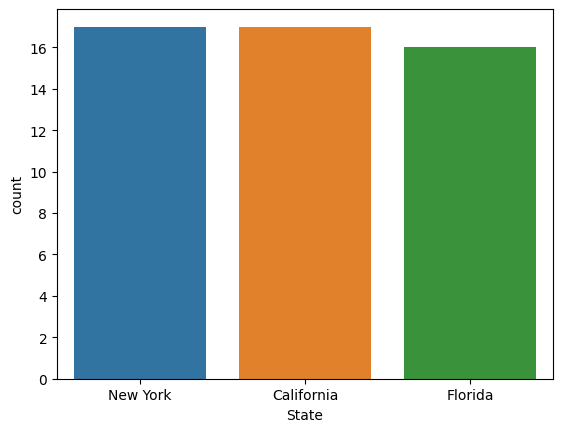

In [36]:
sns.countplot(x = df.State)

In [37]:
t = pd.get_dummies(df.State)
c = pd.DataFrame([])
for i in t.columns:
    c[f'{i}'] = t[f'{i}'].apply(lambda x: 0 if x==False else 1)

In [38]:
df = pd.concat([df, c], axis = 1)

In [39]:
df.drop('State', axis = 1, inplace = True)

In [40]:
df

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [41]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
California         0
Florida            0
New York           0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
 4   California       50 non-null     int64  
 5   Florida          50 non-null     int64  
 6   New York         50 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 2.9 KB


In [43]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.340000,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.478518,0.471212,0.478518
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000,1.000000


In [45]:
x = df.drop('Profit', axis = 1) # Independent Variables
y = df[['Profit']]

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size = 0.25, random_state = 0)

In [47]:
x_train

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
34,46426.07,157693.92,210797.67,1,0,0
18,91749.16,114175.79,294919.57,0,1,0
7,130298.13,145530.06,323876.68,0,1,0
14,119943.24,156547.42,256512.92,0,1,0
45,1000.23,124153.04,1903.93,0,0,1
48,542.05,51743.15,0.00,0,0,1
29,65605.48,153032.06,107138.38,0,0,1
15,114523.61,122616.84,261776.23,0,0,1
30,61994.48,115641.28,91131.24,0,1,0
32,63408.86,129219.61,46085.25,1,0,0


In [48]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [49]:
lr = LinearRegression()
model = lr.fit(x_train, y_train)

In [50]:
model

LinearRegression()

In [51]:
model.intercept_

array([43227.67187259])

In [52]:
model.coef_

array([[129136.16906838,   4873.36061935,  15824.58409654,
           170.21205364,   -351.57530456,    181.36325093]])

In [53]:
y_pred = model.predict(x_test)
y_pred

array([[104440.72582616],
       [132253.81567698],
       [132872.07174272],
       [ 71707.78771428],
       [178678.9934985 ],
       [115078.13124331],
       [ 66093.9297267 ],
       [ 98759.7276409 ],
       [114113.5994088 ],
       [167979.49411476],
       [ 95786.77295823],
       [ 87785.3497979 ],
       [110455.98228344]])

In [70]:
print(f'''
R2 Score of Test Data set: {r2_score(y_test, y_pred)}
R2 Score of Train Data set: {r2_score(y_train, model.predict(x_train))}
Root Mean Squared Error of Test Dataset: {np.sqrt(mean_squared_error(y_test, y_pred))}
Root Mean Squared Error of Train Dataset: {np.sqrt(mean_squared_error(y_train, model.predict(x_train)))}
''')


R2 Score of Test Data set: 0.931581519915205
R2 Score of Train Data set: 0.9511705268907698
Root Mean Squared Error of Test Dataset: 8591.234654128719
Root Mean Squared Error of Train Dataset: 9271.313137818841



In [61]:
r2_score(y_train, model.predict(x_train))

0.9511705268907698

In [63]:
mean_squared_error(y_test, y_pred)

73809312.88230221

In [64]:
np.sqrt(mean_squared_error(y_test, y_pred))

8591.234654128719

In [68]:
mean_squared_error(y_train, model.predict(x_train))

85957247.29949224

In [67]:
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))

9271.313137818841

In [69]:
y_test.mean()

Profit    117058.926154
dtype: float64